# Medical conditions dataset  

### Description 

A medical conditions dataset is a collection of information about various health-related issues experienced by people. This data can include symptoms, diagnoses, treatments, and outcomes for different diseases and conditions. The dataset is gathered using various methods, or "modalities," such as electronic health records, surveys, wearable devices, and medical imaging. The purpose of collecting and analyzing this information is to better understand health trends, identify risk factors, and improve medical care for everyone.

### Introduction

Medical diagnosis in research studies plays a crucial role in the understanding and advancement of medicine. In clinical research, the process of diagnosis is used to identify individuals with specific medical conditions and to determine the prevalence of these conditions within a study population. Diagnosis is also used to identify subgroups of individuals with similar characteristics or outcomes, which can help researchers to better understand the underlying disease mechanisms and to develop risk models, identify biomarkers for early detection of the disease and for monitoring its progress and to develop  new treatments.

Survey data is a valuable resource for understanding various aspects of medical conditions. It involves collecting self-reported information from individuals about their health, symptoms, diagnoses, treatments, and lifestyle factors. This data is tabular, meaning it is organized in rows and columns, which makes it easy to analyze and compare.

Medical conditions data collected through surveys covers diverse body systems, such as the cardiovascular, respiratory, digestive, and nervous systems. It provides insights into disease prevalence, risk factors, and the impact on individuals' lives.

Surveys are an attractive data modality due to their accessibility, cost-effectiveness, and ability to capture patient perspectives. This information helps researchers identify potential risk factors, inform prevention strategies, and shape public health policies, ultimately contributing to better health outcomes for diverse populations.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Upon registration to the Human Phenotype Project study, participants provide details about their medical conditions in the Initial Medical Survey. Further data is then gathered during an interview at the baseline visit (In-system drop down) and using the Follow-up Medical Survey when participants return for subsequent visits. The data source columns indicate where information was collected.

Questions and self-reported medical diagnoses were mapped to ICD-11 codes. Medical diagnoses at baseline were determined as diagnoses that were reported at the baseline visit or with an onset date prior to the baseline visit.

#### Baseline
*  Participants fill in medical conditions history in the Initial Medical Survey.
*  Interviewer asks participant question and fill in a drop down list of different conditions participants have (In-system drop down).

#### Every follow up visit/ call and baseline
* Follow-up Medical Survey -
    * Medical questionnaire asks about conditions.
    * Should fill in the date when new condition was founded .

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `medical_conditions.parquet` 

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/021-medical_conditions.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/21)


In [2]:
%load_ext autoreload
%autoreload 2
from pheno_utils import PhenoLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
pl = PhenoLoader('medical_conditions', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for medical_conditions with
13 fields
2 tables: ['medical_conditions', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,relative_location,units,bulk_dictionary,sampling_rate,transformation,list_of_tags,stability,sexed,debut,completed
tabular_field_name,,,,,,,,,,,,,,,,,,,,
medical_condition,Medical condition name,Medical condition name,21,medical_conditions,Text,Primary,NaN,Multiple,string,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
icd11_code,ICD11 code,ICD-11 codes are the latest global system for ...,21,medical_conditions,Text,Primary,NaN,Multiple,string,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
data_source,Data source of medical condition,Data source the self reporting of medical cond...,21,medical_conditions,Text,Primary,NaN,Multiple,string,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
start_month,Start month,Start month,21,medical_conditions,Integer,Primary,NaN,Multiple,int,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
start_year,Start year,Start year,21,medical_conditions,Integer,Primary,NaN,Multiple,int,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
end_month,End month,Start month,21,medical_conditions,Integer,Primary,NaN,Multiple,int,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
end_year,End year,End year,21,medical_conditions,Integer,Primary,NaN,Multiple,int,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
medical_condition_heb,Medical condition hebrew name,Medical condition hebrew name,21,medical_conditions,Text,Supporting,NaN,Multiple,string,NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN
collection_timestamp,Collection time,Collection time,21,medical_conditions,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,medical_conditions/medical_conditions.parquet,NaN,NaN,NaN,NaN,NaN,Accruing,Both sexes,11/21/2018,NaN


# Prevalence of conditions from the initial survey drop down list

In [8]:
# filter out baseline visit
data = pl[pl.fields] # get all fields, with age and sex
data = data[data.index.get_level_values('research_stage') == '00_00_visit']
data = data[data.data_source == 'in system drop down list']
data.head()

,,,,collection_date,collection_timestamp,data_source,end_month,end_year,icd11_code,medical_condition,medical_condition_heb,start_month,start_year,timezone,age,sex
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,
5516424321,10k,00_00_visit,0,2020-11-28 07:20:59.999913216,2020-12-03 18:35:57.553438208,in system drop down list,0,0,DD7Z,alopecia areata,<NA>,0,0,asia/jerusalem,54.447672,Female
5027574288,10k,00_00_visit,0,2020-12-12 15:45:56.736616192,2020-12-21 12:36:46.728029440,in system drop down list,0,0,<NA>,iron deficiency,<NA>,0,0,asia/jerusalem,54.169913,Male
7783260382,10k,00_00_visit,0,2020-12-11 12:23:11.603861760,2020-12-25 22:39:46.859224064,in system drop down list,0,0,FA25,anal fissure,גידול שפיר על בלוטות יותרת התריס,0,0,asia/jerusalem,45.892093,Male
1178277844,10k,00_00_visit,0,2020-09-01 15:42:04.319813120,2020-09-12 07:02:26.466278400,in system drop down list,0,0,5B5K.1Z,hyperprolactinaemia,<NA>,0,1998,asia/jerusalem,44.435100,Female
1622660825,10k,00_00_visit,0,2021-01-18 16:42:51.806825984,2021-01-07 21:04:15.859397632,in system drop down list,0,0,FA25,epilepsy or seizures,<NA>,0,0,asia/jerusalem,44.621536,Male


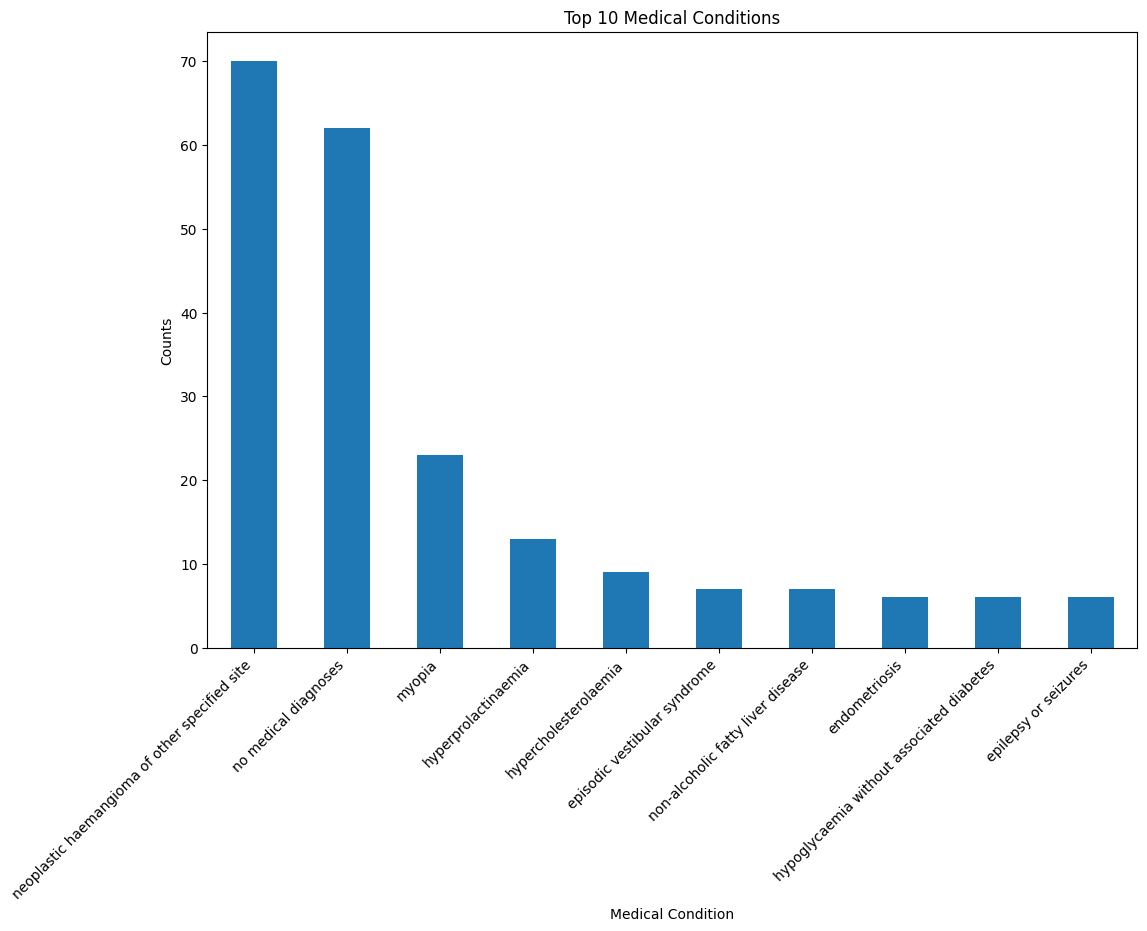

In [9]:
import matplotlib.pyplot as plt

# Assuming top_10_conditions holds the count of the top 10 medical conditions
top_10_conditions = data['medical_condition'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 8))  #
top_10_conditions.plot(kind='bar')

# Adding plot title and labels
plt.title('Top 10 Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()
